<a href="https://colab.research.google.com/github/Chinmaya54/CP_02_T16_MineCrafters/blob/main/Final_EDA_CP_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPLORATORY DATA ANALYSIS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
authors_df = pd.read_csv('/content/drive/MyDrive/authors.csv')
categories_df = pd.read_csv('/content/drive/MyDrive/categories.csv')
formats_df = pd.read_csv('/content/drive/MyDrive/formats.csv')

**Extracting Top 100 rows based on Bestsellers Rank**

In [ ]:
# Top 100 highest bestseller ranks
top_bestsellers = dataset_df.nlargest(100, 'bestsellers-rank')
language_counts = top_bestsellers['description'].value_counts()

**Word Cloud of column Description( for Top 100 rows based on Bestsellers Rank)**

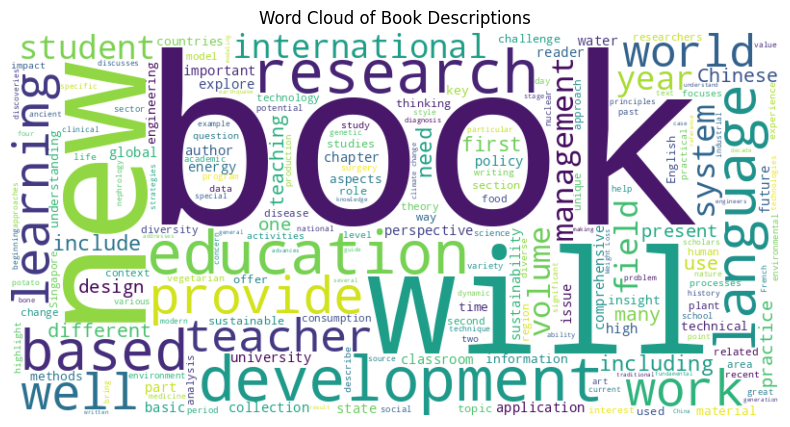

In [ ]:
from wordcloud import WordCloud

text = " ".join(str(description) for description in top_bestsellers['description'] if not pd.isnull(description))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)  # for top 100 bestsellers rank

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Descriptions')
plt.show()

**INSIGHTS :**

* Education and learning are prominent.
* The dataset may include research-related books.
* It has an international focus.
* Language and literature topics are present.
* NEW may indicate new publications.



**Word Cloud of column Title( for Top 100 rows based on Bestsellers Rank)**

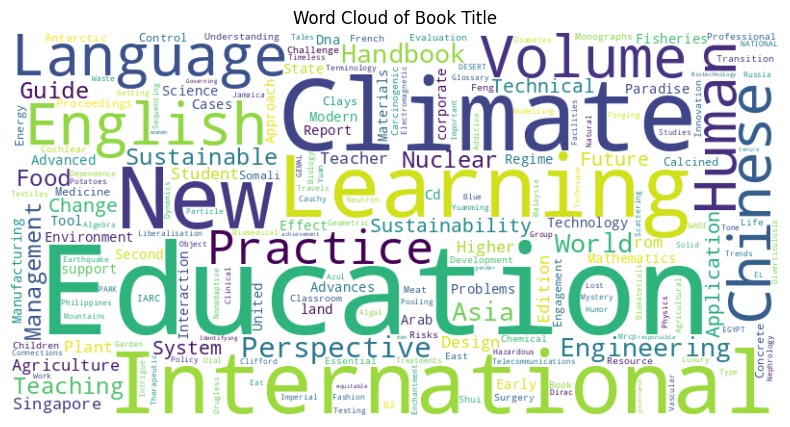

In [ ]:
text = " ".join(str(description) for description in top_bestsellers['title'] if not pd.isnull(description))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)   # for top 100 bestsellers rank

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Title')
plt.show()

**INSIGHTS :**

- The book collection primarily revolves around education.
- It includes a wide variety of books from around the world.
- Climate-related topics are also a significant part of the collection.
- Some books come in multiple volumes.
- The collection covers language and English-related books.
- There are books that focus on human-related subjects.
- Many new books are available in the collection.

**Barplot for Language Disribution of Books(for Top 100 rows based on Bestsellers Rank)**

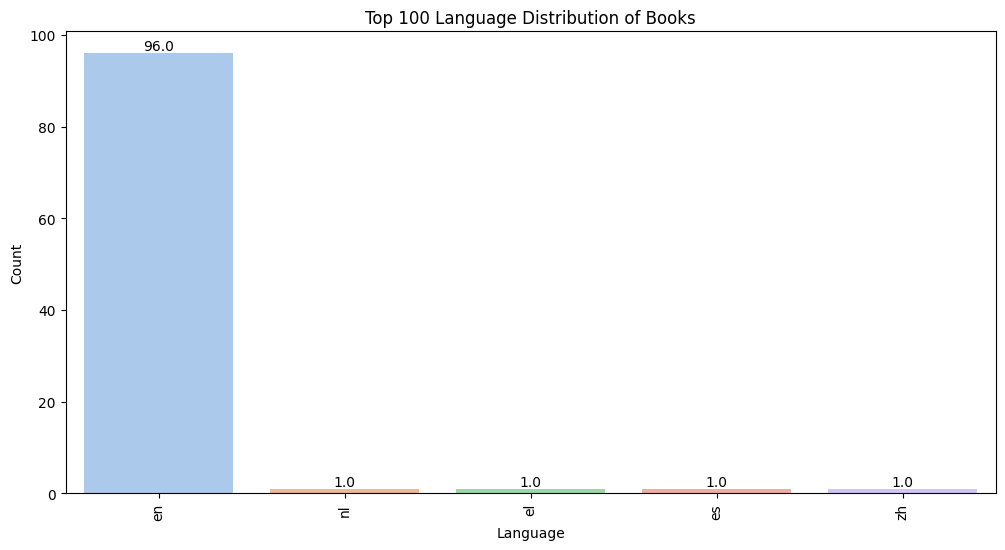

In [ ]:
language_counts = top_bestsellers['lang'].value_counts()

plt.figure(figsize=(12, 6))

ax = sns.countplot(data=top_bestsellers, x='lang', palette='pastel')
plt.title('Top 100 Language Distribution of Books')
plt.xlabel('Language')
plt.ylabel('Count')

plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


**INSIGHTS :**

- Most books in the dataset are written in English, indicating it's a popular language.
- Other languages like nl, el and zs have a significantly lower presence.
- English dominates the collection than other languages.
- The dataset's primary language is English, making it accessible to a wider audience.


**Barplot for Format Disribution of Books(for Top 100 rows based on Bestsellers Rank)**

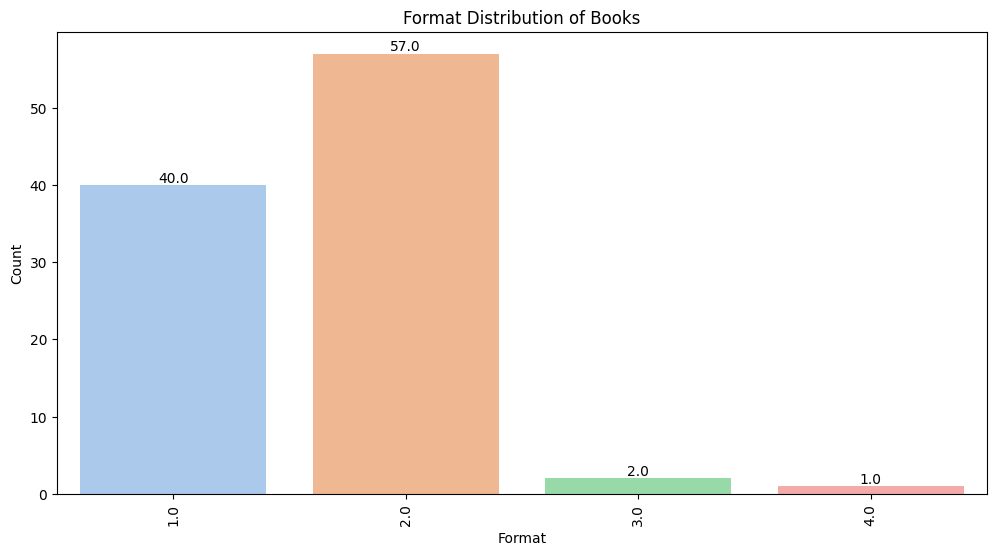

In [ ]:
format_counts = top_bestsellers['format'].value_counts()

plt.figure(figsize=(12, 6))

ax = sns.countplot(data=top_bestsellers, x='format', palette='pastel')
plt.title('Format Distribution of Books')
plt.xlabel('Format')
plt.ylabel('Count')

plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [ ]:
format_to_lookup = [1, 2, 3, 4]
filtered_formats = formats_df[formats_df['format_id'].isin(format_to_lookup)]

format_names = filtered_formats['format_name'].tolist()

print("Format IDs:", format_to_lookup)
print("Format Names for IDs:", format_names)

Format IDs: [1, 2, 3, 4]
Format Names for IDs: ['CD', 'Hardback', 'Mixed', 'Paperback']


**INSIGHTS :**

- The majority of books in the dataset are available in the "hardback" format, suggesting a preference for physical copies.
- "CD" format books come next in popularity, with 40 books using this medium.
- A very small number of books use the "mixed" format, while only one book is in "paperback."
- "Hardback" and "CD" formats dominate the collection, while others have limited representation.

**Barplot for Top Edition of Books(for Top 100 rows based on Bestsellers Rank)**

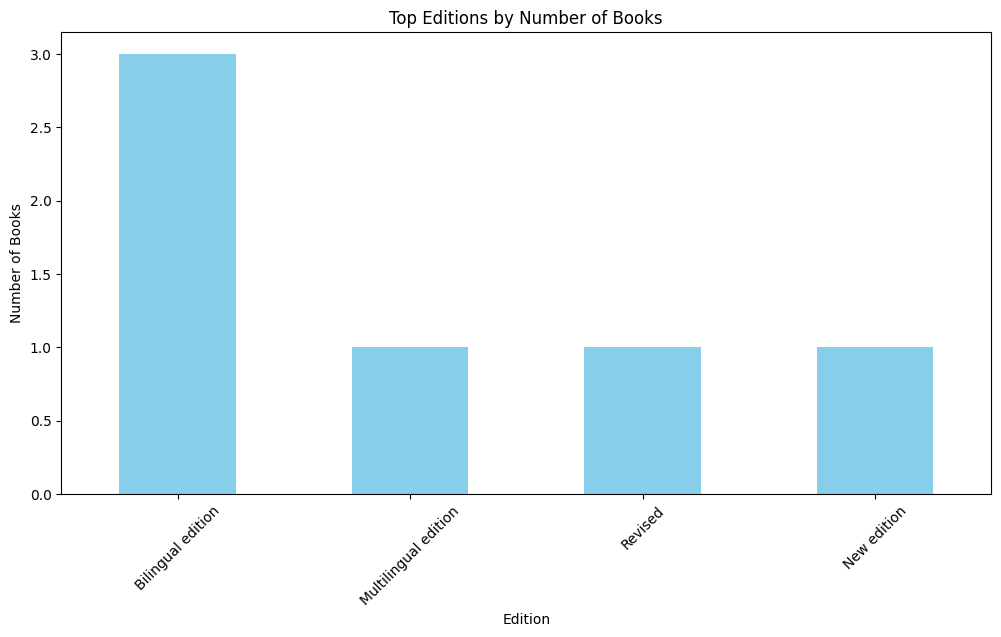

In [ ]:
edition_counts = top_bestsellers['edition'].value_counts()
top_editions = edition_counts.head(10)
plt.figure(figsize=(12, 6))
top_editions.plot(kind='bar', color='skyblue')
plt.title('Top Editions by Number of Books')
plt.xlabel('Edition')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

**INSIGHTS :**

- The most common edition for books in the dataset is "Bilingual," indicating the prevalence of books than to multiple languages.
- The "Multilingual," "Revised," and "New Edition" formats share an equal number of books.
- The dataset contains diverse editions, but "Bilingual" is the most prominent, showcasing the importance of language versatility in literature.

**Barplot for Weight Distribution of Books(for Top 100 rows based on Bestsellers Rank)**

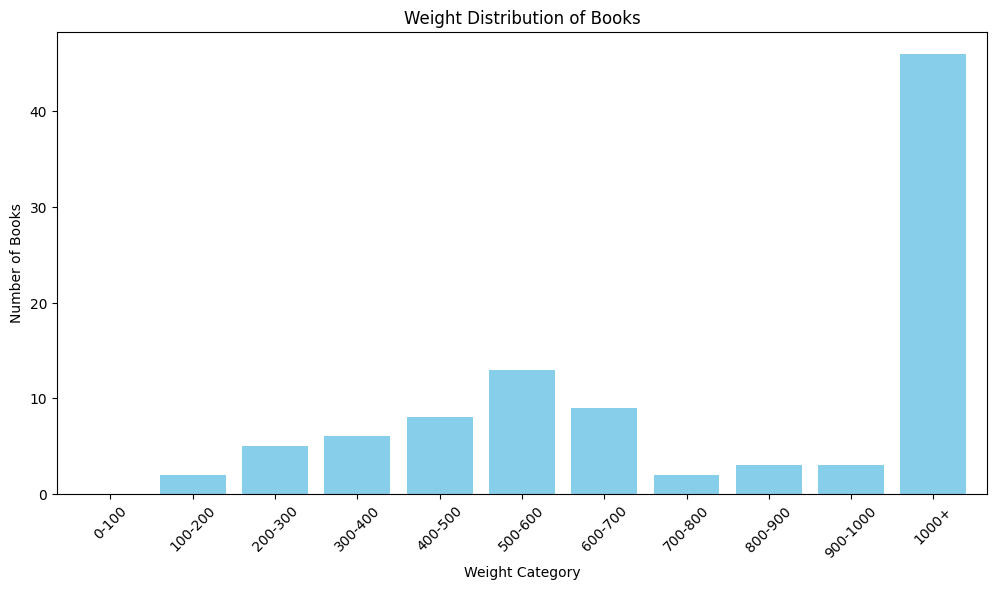

In [ ]:
top_bestsellers['weight'] = pd.to_numeric(top_bestsellers['weight'], errors='coerce')

weight_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
weight_labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+']

top_bestsellers['weight_category'] = pd.cut(top_bestsellers['weight'], bins=weight_bins, labels=weight_labels, right=False)

top_bestsellers = top_bestsellers.dropna(subset=['weight_category'])

weight_category_counts = top_bestsellers['weight_category'].value_counts().reindex(weight_labels, fill_value=0)
plt.figure(figsize=(12, 6))
weight_category_counts.plot(kind='bar', color='skyblue', width=0.8)
plt.title('Weight Distribution of Books')
plt.xlabel('Weight Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


**INSIGHTS :**

- The majority of books in the dataset weigh 1000 grams or more, with more than 40 books falling into this category.
- The second most common weight range for books is between 500 and 600 grams, with over 10 books in this category.
- Books in the weight range of 600-700 grams are also fairly common, followed by those in the 400-500 gram range.
- The dataset features a diverse range of book weights, but heavier books (1000+ grams) dominate.


**Distribution of Languages for the 100 Lowest Bestseller Ranks**

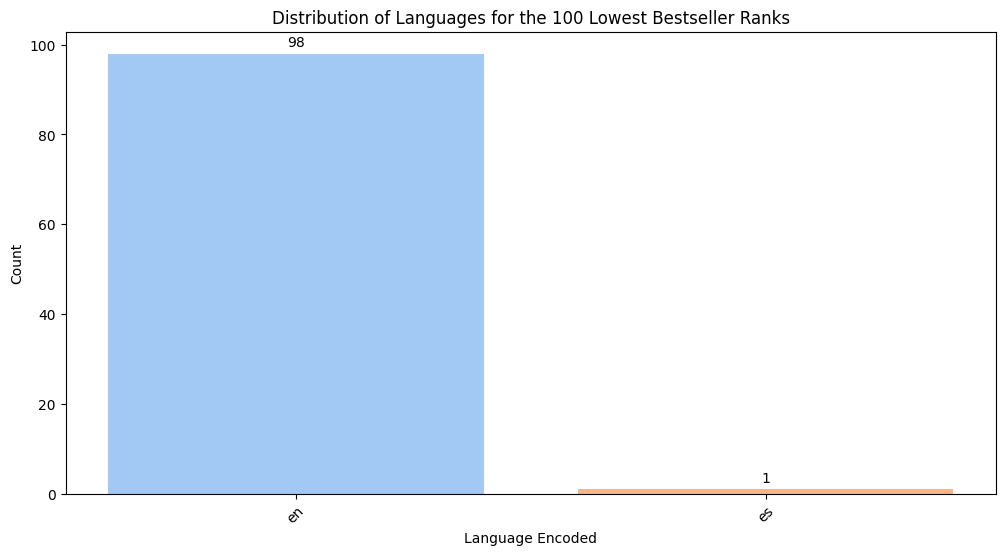

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lowest_bestsellers = dataset_df.nsmallest(100, 'bestsellers-rank')
language_counts = lowest_bestsellers['lang'].value_counts()
colors = sns.color_palette("pastel", len(language_counts))

plt.figure(figsize=(12, 6))
bars = plt.bar(language_counts.index, language_counts, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Languages for the 100 Lowest Bestseller Ranks')
plt.xlabel('Language Encoded')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**INSIGHTS :**

- Among the top 100 books with the lowest bookseller ranks, the vast majority (98 books) are written in English.
- Only one book is in es.
- This indicates that English-language books are highly represented among the books with the lowest bookseller ranks in the dataset.

**Top 20 Most Frequent categories**

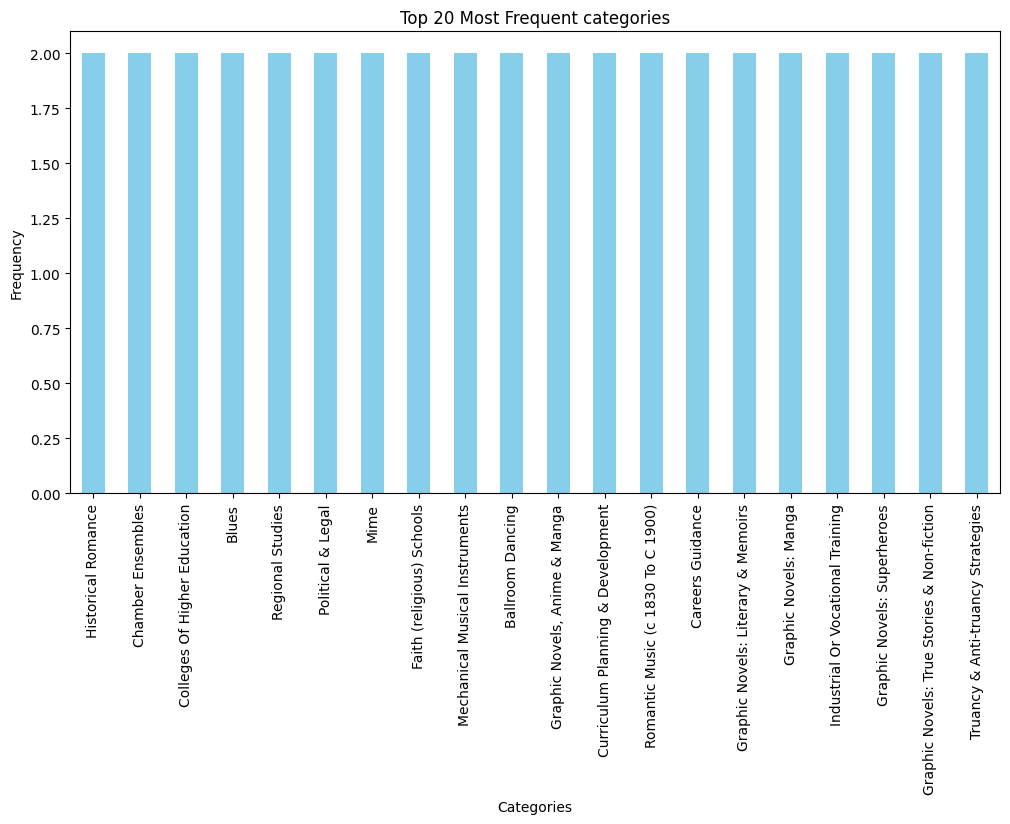

In [ ]:
top_20_author_names = categories_df['category_name'].value_counts().head(20)

# top 20 author names
plt.figure(figsize=(12, 6))
top_20_author_names.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
plt.show()

**INSIGHTS :**

- The top 20 most frequent categories in the dataset have the same frequency, meaning each of them occurs with equal representation.
- This suggests a diverse range of book categories, and there isn't one dominant category among the top 20.

**Top 20 Authors by Frequency**

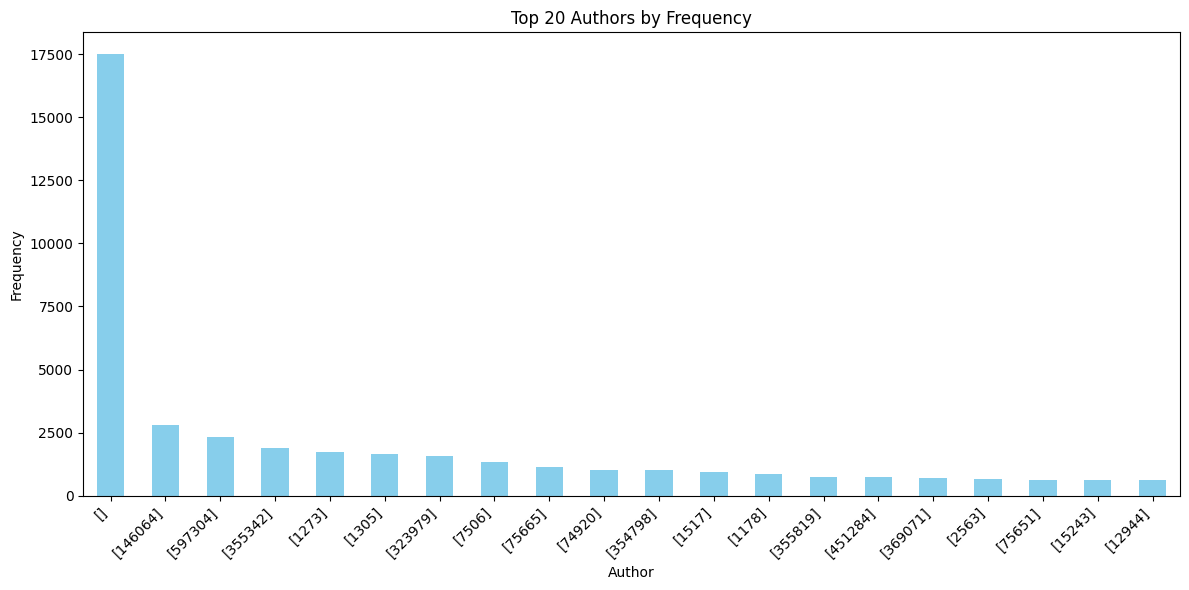

In [ ]:
author_counts = dataset_df['authors'].value_counts()

author_counts_sorted = author_counts.sort_values(ascending=False) # author count in descending order

# top 20 authors
top_20_authors = author_counts_sorted.head(20)

plt.figure(figsize=(12, 6))
top_20_authors.plot(kind='bar', color='skyblue')
plt.title('Top 20 Authors by Frequency')
plt.xlabel('Author')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# List of author IDs you want
author_ids_to_lookup = [146064, 597304, 355342, 1273, 1305, 323979, 7506, 75665, 74920, 354798, 1517, 1178, 355819, 451284, 369071, 2563, 75651, 15243, 12944]
filtered_authors = authors_df[authors_df['author_id'].isin(author_ids_to_lookup)]

author_names = filtered_authors['author_name'].tolist()

print("Author IDs:", author_ids_to_lookup)
print("Author Names for IDs:", author_names)

Author IDs: [146064, 597304, 355342, 1273, 1305, 323979, 7506, 75665, 74920, 354798, 1517, 1178, 355819, 451284, 369071, 2563, 75651, 15243, 12944]
Author Names for IDs: ['Anonymous', 'Atkins Avenue Books', 'Babadada GmbH', 'Courtney Wegner', 'DESIGN', 'DK', 'Distinctive Journals', 'Emma Loren', 'Francis Sweet', 'McGraw Hill', 'Mens Dirty Joke Publishing', 'National Learning Corporation', 'Shamrock Logbook', 'Sheldon Franks', 'Various', 'Weezag', 'Wild Pages Press', 'William Shakespeare', 'Yourdinonotes Publishing']


**INSIGHTS :**

- The majority of books in the dataset are authored by "Anonymous," with an approximate frequency of 17,500.
- The second most prolific author is "Atkins Avenue Books" with a frequency of around 2,500.
- There is a noticeable drop in frequency after these two authors, with only slight variations among the other authors.
- This suggests that many books in the dataset do not have specific named authors, and there is a long tail of authors with relatively fewer books attributed to them.

**Top 20 Imprint Frequencies**

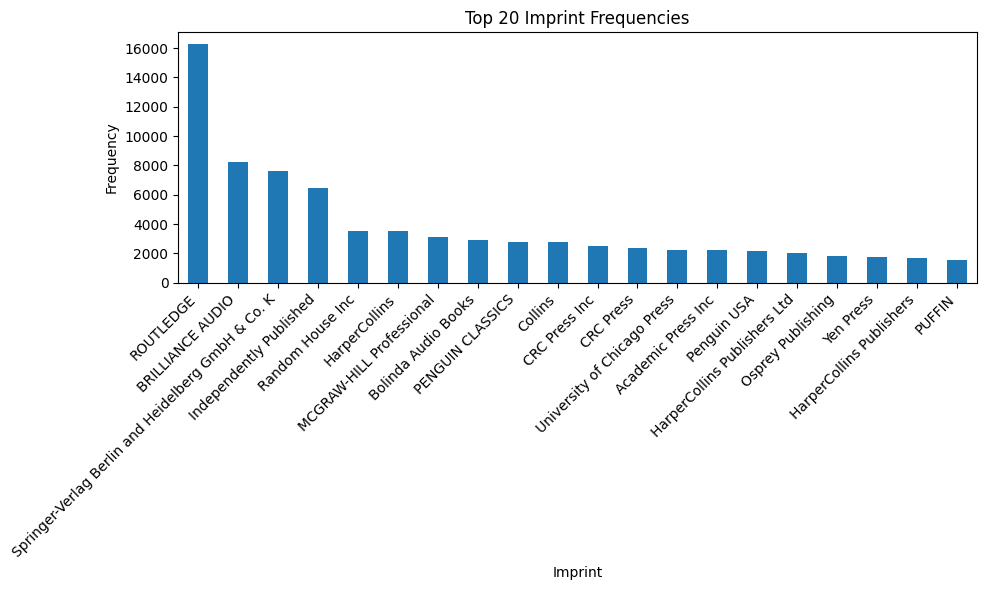

In [ ]:
imprint_counts = dataset_df['imprint'].value_counts().head(20)  # top 20 imprint frequencies

# Create a bar plot
plt.figure(figsize=(10, 6))
imprint_counts.plot(kind='bar')
plt.title('Top 20 Imprint Frequencies')
plt.xlabel('Imprint')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**INSIGHTS :**

- The publication house "Routledge" has published the highest number of books, with a frequency of approximately 16,000.
- "Brilliance Audio" follows closely behind with a frequency of around 8,000.
- "Independently published" is also a significant publisher, with a frequency of about 7,000.
- "Random House Inc" has published around 4,000 books.
- Several other imprints, such as "Osprey Publishing," "Yen Press," and "Puffin," have frequencies of around 2,000.
- This data indicates the prominence of certain publishing houses in the dataset, with "Routledge" leading by a considerable margin.